In [1]:
import pandas as pd

df = pd.read_csv('../data/spotify_history.csv')
df.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [2]:
print(len(df))

149860


In [3]:
print(df.columns)

Index(['spotify_track_uri', 'ts', 'platform', 'ms_played', 'track_name',
       'artist_name', 'album_name', 'reason_start', 'reason_end', 'shuffle',
       'skipped'],
      dtype='object')


In [4]:
df.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [5]:
df.tail()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
149855,4Fz1WWr5o0OrlIcZxcyZtK,2024-12-15 23:06:19,android,1247,On The Way Home,John Mayer,Paradise Valley,fwdbtn,fwdbtn,True,True
149856,0qHMhBZqYb99yhX9BHcIkV,2024-12-15 23:06:21,android,1515,Magical Mystery Tour - Remastered 2009,The Beatles,Magical Mystery Tour,fwdbtn,fwdbtn,True,True
149857,0HHdujGjOZChTrl8lJWEIq,2024-12-15 23:06:22,android,1283,"Stop This Train - Live at the Nokia Theatre, L...",John Mayer,Where the Light Is: John Mayer Live In Los Ang...,fwdbtn,fwdbtn,True,True
149858,7peh6LUcdNPcMdrSH4JPsM,2024-12-15 23:06:23,android,1306,I Don't Trust Myself (With Loving You),John Mayer,Continuum,fwdbtn,fwdbtn,True,True
149859,6iGU74CwXuT4XVepjc9Emf,2024-12-15 23:06:25,android,1893,God Only Knows - Mono,The Beach Boys,Pet Sounds,fwdbtn,fwdbtn,True,True


In [6]:
# Convert ms_played to minutes (easier to understand)
df['minutes_played'] = df['ms_played'] / 60000

# Check it worked
df[['track_name', 'ms_played', 'minutes_played']].head()

,track_name,ms_played,minutes_played
0,"Say It, Just Say It",3185,0.053083
1,Drinking from the Bottle (feat. Tinie Tempah),61865,1.031083
2,Born To Die,285386,4.756433
3,Off To The Races,134022,2.233700
4,Half Mast,0,0.000000


In [7]:
# Total listening time in hours
total_minutes = df['minutes_played'].sum()
total_hours = total_minutes / 60

print(f"Total listening time: {total_hours:.0f} hours")

Total listening time: 5342 hours


In [8]:
# Top 10 most listened artists
top_artists = df.groupby('artist_name')['minutes_played'].sum()
top_artists = top_artists.sort_values(ascending=False)
top_artists.head(10)

artist_name
The Beatles           20169.742533
The Killers           17659.275267
John Mayer            12086.990717
Bob Dylan              9490.939933
Paul McCartney         5955.906167
Howard Shore           5815.511250
The Strokes            5291.806983
The Rolling Stones     5131.950150
Pink Floyd             4342.197367
Led Zeppelin           4138.971317
Name: minutes_played, dtype: float64

In [9]:
# Top 10 most played songs
top_tracks = df.groupby('track_name')['minutes_played'].sum()
top_tracks = top_tracks.sort_values(ascending=False)
top_tracks.head(10)

track_name
Ode To The Mets                                                                        1123.859667
The Return of the King (feat. Sir James Galway, Viggo Mortensen and Renee Fleming)     1073.361017
The Fellowship Reunited (feat. Sir James Galway, Viggo Mortensen and Renée Fleming)     745.945500
19 Dias y 500 Noches - En Directo                                                       715.234033
In the Blood                                                                            640.451450
Claudia's Theme - Version Eight                                                         618.681667
Dying Breed                                                                             603.044217
The Breaking of the Fellowship (feat. "In Dreams")                                      599.848300
All These Things That I've Done                                                         595.915250
Caution                                                                                 593.665750

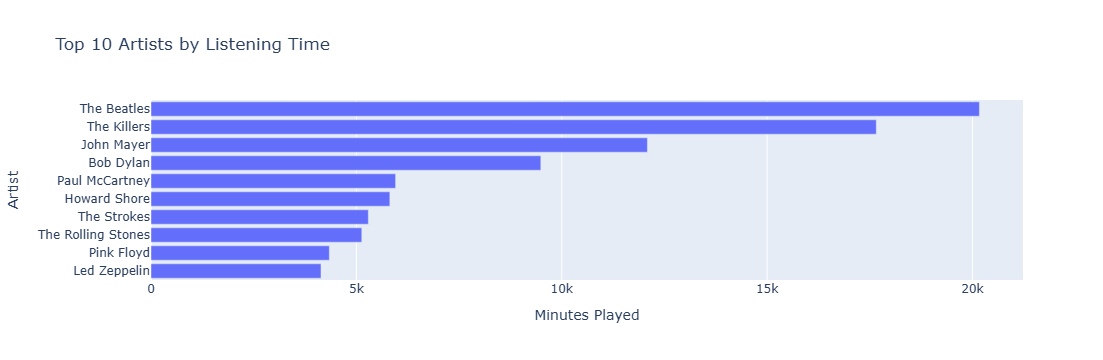

In [10]:
import plotly.express as px

# Get top 10 artists
top_10_artists = top_artists.head(10)

# Create bar chart
fig = px.bar(
    x=top_10_artists.values, 
    y=top_10_artists.index, 
    orientation='h',
    title='Top 10 Artists by Listening Time',
    labels={'x': 'Minutes Played', 'y': 'Artist'}
)
fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.show()

In [11]:
# Convert ts to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Extract year
df['year'] = df['ts'].dt.year

# Total minutes per year
yearly = df.groupby('year')['minutes_played'].sum()
print(yearly)

year
2013      469.807883
2014       62.363783
2015     3554.916217
2016    11857.372633
2017    40238.627900
2018    28453.743167
2019    28749.643183
2020    55239.198083
2021    53505.555517
2022    38494.803933
2023    30903.818483
2024    28962.331467
Name: minutes_played, dtype: float64


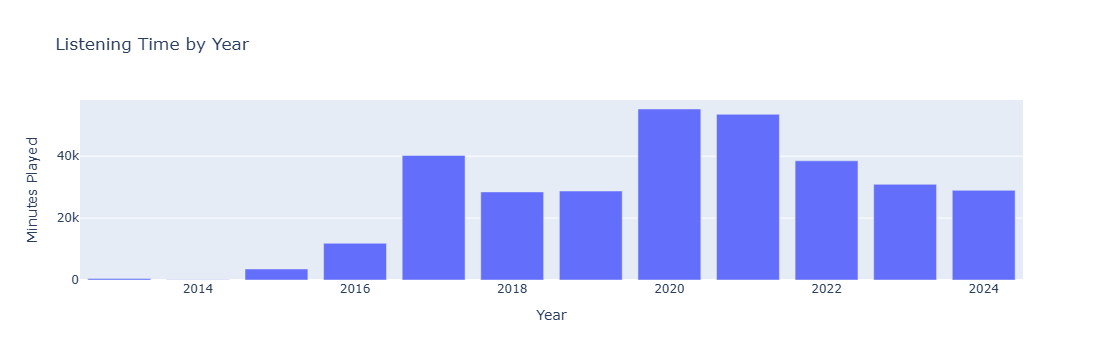

In [12]:
fig = px.bar(
    x=yearly.index, 
    y=yearly.values,
    title='Listening Time by Year',
    labels={'x': 'Year', 'y': 'Minutes Played'}
)
fig.show()

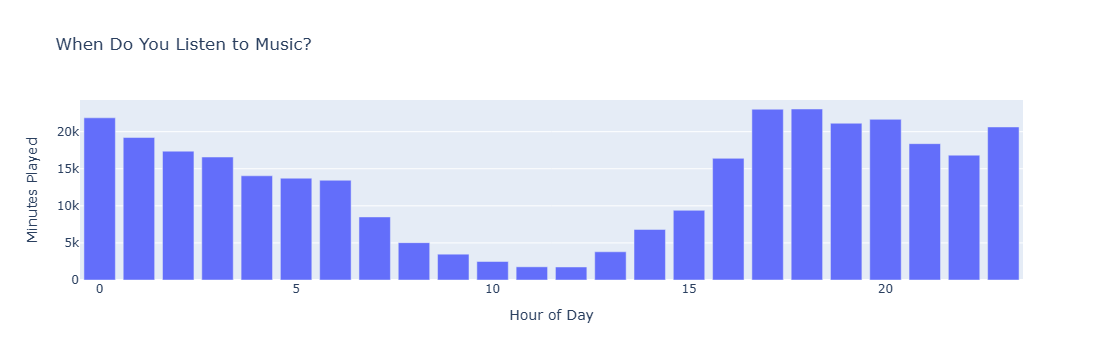

In [13]:
# Extract hour from timestamp
df['hour'] = df['ts'].dt.hour

# Total minutes per hour
hourly = df.groupby('hour')['minutes_played'].sum()

# Chart
fig = px.bar(
    x=hourly.index, 
    y=hourly.values,
    title='When Do You Listen to Music?',
    labels={'x': 'Hour of Day', 'y': 'Minutes Played'}
)
fig.show()

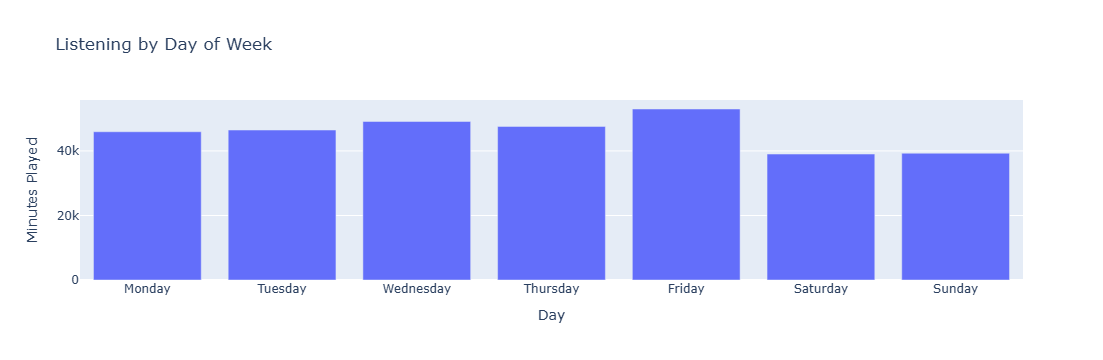

In [14]:
# Extract day of week (0 = Monday, 6 = Sunday)
df['day_of_week'] = df['ts'].dt.day_name()

# Total minutes per day
daily = df.groupby('day_of_week')['minutes_played'].sum()

# Reorder days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily = daily.reindex(day_order)

# Chart
fig = px.bar(
    x=daily.index, 
    y=daily.values,
    title='Listening by Day of Week',
    labels={'x': 'Day', 'y': 'Minutes Played'}
)
fig.show()

In [15]:
# How many tracks were skipped?
skipped_counts = df['skipped'].value_counts()
print(skipped_counts)

# Skip rate
skip_rate = skipped_counts[True] / len(df) * 100
print(f"\nSkip rate: {skip_rate:.1f}%")

skipped
False    141991
True       7869
Name: count, dtype: int64

Skip rate: 5.3%


In [16]:
# Get only skipped tracks
skipped_df = df[df['skipped'] == True]

# Count skips per artist
skipped_artists = skipped_df['artist_name'].value_counts().head(10)
print(skipped_artists)

artist_name
The Beatles           388
The Killers           197
Bob Dylan             163
John Mayer            153
Led Zeppelin          128
The Rolling Stones    125
The Script            121
Imagine Dragons       116
Paul McCartney        107
Radiohead             102
Name: count, dtype: int64


In [17]:
# Count total plays per artist
plays_per_artist = df['artist_name'].value_counts()

# Count skips per artist
skips_per_artist = df[df['skipped'] == True]['artist_name'].value_counts()

# Calculate skip rate
skip_rate_by_artist = (skips_per_artist / plays_per_artist * 100).dropna()

# Only artists with 100+ plays
popular_artists = plays_per_artist[plays_per_artist >= 100].index
skip_rate_filtered = skip_rate_by_artist[skip_rate_by_artist.index.isin(popular_artists)]

# Sort and show highest skip rates
skip_rate_filtered = skip_rate_filtered.sort_values(ascending=False)
print(skip_rate_filtered.head(10))

artist_name
David Bisbal      24.642857
We The Kings      24.299065
Justin Bieber     23.809524
B.B. King         22.413793
Kendrick Lamar    17.948718
Seu Jorge         17.142857
The Doors         16.477273
WALK THE MOON     15.384615
The Script        13.549832
Fall Out Boy      13.306452
Name: count, dtype: float64


In [18]:
# Which platforms do you use?
platform_counts = df['platform'].value_counts()
print(platform_counts)

platform
android           139821
cast to device      3898
iOS                 3049
windows             1691
mac                 1176
web player           225
Name: count, dtype: int64


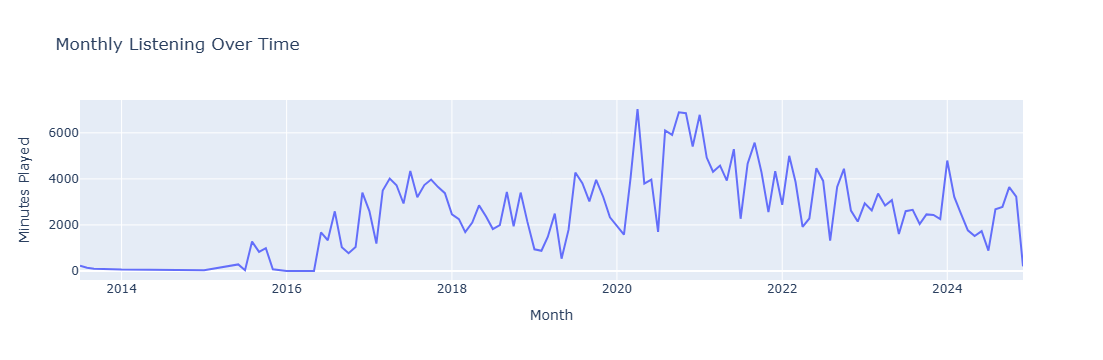

In [19]:
# Group by month
df['month'] = df['ts'].dt.to_period('M')
monthly = df.groupby('month')['minutes_played'].sum()

# Convert to string for plotting
monthly.index = monthly.index.astype(str)

# Chart
fig = px.line(
    x=monthly.index, 
    y=monthly.values,
    title='Monthly Listening Over Time',
    labels={'x': 'Month', 'y': 'Minutes Played'}
)
fig.show()

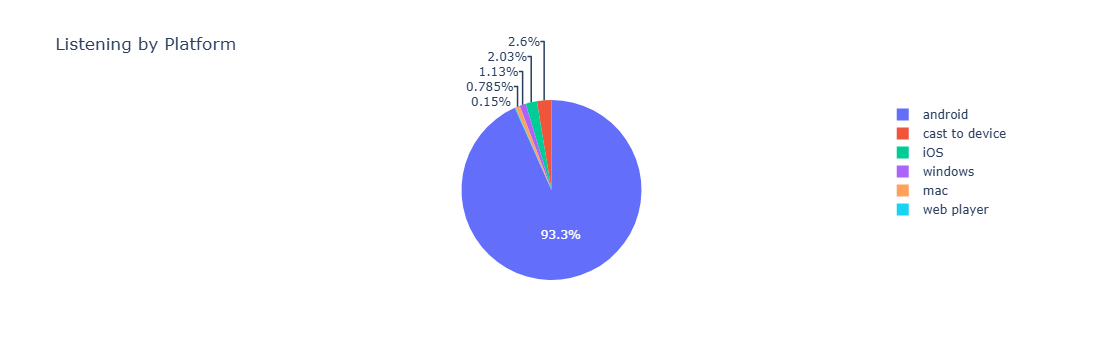

In [20]:
fig = px.pie(
    values=platform_counts.values, 
    names=platform_counts.index,
    title='Listening by Platform'
)
fig.show()


In [21]:
# Calculate all the key stats
total_hours = df['minutes_played'].sum() / 60
total_tracks = len(df)
unique_artists = df['artist_name'].nunique()
unique_tracks = df['track_name'].nunique()
top_artist = top_artists.index[0]
top_track = top_tracks.index[0]

print("=" * 40)
print("YOUR SPOTIFY WRAPPED")
print("=" * 40)
print(f"Total Listening Time: {total_hours:.0f} hours")
print(f"Total Tracks Played: {total_tracks:,}")
print(f"Unique Artists: {unique_artists:,}")
print(f"Unique Tracks: {unique_tracks:,}")
print(f"Top Artist: {top_artist}")
print(f"Top Track: {top_track}")
print(f"Favorite Day: Friday")
print(f"Peak Hour: 6 PM")
print(f"Skip Rate: 5.3%")
print("=" * 40)

YOUR SPOTIFY WRAPPED
Total Listening Time: 5342 hours
Total Tracks Played: 149,860
Unique Artists: 4,113
Unique Tracks: 13,839
Top Artist: The Beatles
Top Track: Ode To The Mets
Favorite Day: Friday
Peak Hour: 6 PM
Skip Rate: 5.3%


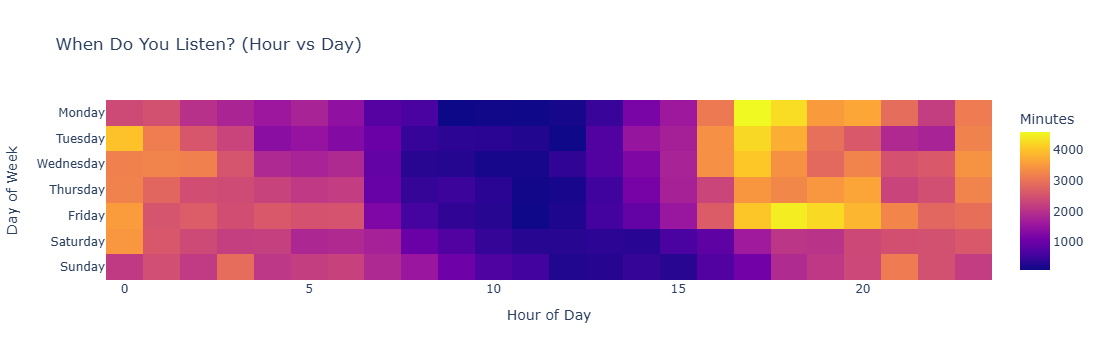

In [22]:
# Create a pivot table: hours vs days
heatmap_data = df.groupby(['day_of_week', 'hour'])['minutes_played'].sum().reset_index()
heatmap_pivot = heatmap_data.pivot(index='day_of_week', columns='hour', values='minutes_played')

# Reorder days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_pivot = heatmap_pivot.reindex(day_order)

# Create heatmap
fig = px.imshow(
    heatmap_pivot,
    title='When Do You Listen? (Hour vs Day)',
    labels={'x': 'Hour of Day', 'y': 'Day of Week', 'color': 'Minutes'},
    aspect='auto'
)
fig.show()

In [23]:
import os

output_folder = '../output'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [24]:
# Top Artists
fig = px.bar(
    x=top_artists.head(10).values, 
    y=top_artists.head(10).index, 
    orientation='h',
    title='Top 10 Artists by Listening Time',
    labels={'x': 'Minutes Played', 'y': 'Artist'}
)
fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.write_image(f'{output_folder}/top_artists.png')

In [25]:
# Yearly Listening
fig = px.bar(
    x=yearly.index, 
    y=yearly.values,
    title='Listening Time by Year',
    labels={'x': 'Year', 'y': 'Minutes Played'}
)
fig.write_image(f'{output_folder}/yearly_listening.png')

In [26]:
# Hourly Listening
fig = px.bar(
    x=hourly.index, 
    y=hourly.values,
    title='When Do You Listen to Music?',
    labels={'x': 'Hour of Day', 'y': 'Minutes Played'}
)
fig.write_image(f'{output_folder}/hourly_listening.png')

In [27]:
# Heatmap
fig = px.imshow(
    heatmap_pivot,
    title='When Do You Listen? (Hour vs Day)',
    labels={'x': 'Hour of Day', 'y': 'Day of Week', 'color': 'Minutes'},
    aspect='auto'
)
fig.write_image(f'{output_folder}/heatmap.png')